<div align="center">
  <h1>Trabajo Práctico Integrador Base de datos</h1>
</div>

**Tema:** Sistema de Gestión y Recomendación de Viajes   
**Bases de datos a utilizar:** Neo4j, MongoDB, Redis.   
**Integrantes:** Nogueira Santiago  


<u>TABLA DE CONTENIDO</u>
- [Introdución](#introducin)
  - [Estructura](#estructura)
  - [Esquema conceptual](#esquema-conceptual)
  - [Interacción entre archivos y servicios](#interaccin-entre-archivos-y-servicios)
- [Configuración](#configuracin)
  - [Mongo](#mongo)
  - [NEO4J](#neo4j)
  - [REDIS](#redis)
- [Consultas](#consultas)
  - [1. Realizar una carga de datos inicial con:](#1-realizar-una-carga-de-datos-inicial-con)
    - [a; b; c; d; e](#a-b-c-d-e)
    - [f. Caché de búsquedas](#f-cach-de-bsquedas)
    - [g. Usuarios conectados](#g-usuarios-conectados)
    - [h. Reservas temporales (aún no concretadas)](#h-reservas-temporales-an-no-concretadas)
    - [i: j](#i-j)
  - [2. Implementar consultas integradas.](#2-implementar-consultas-integradas)
    - [A - Usuarios que visitaron Bariloche (Neo4j)](#a---usuarios-que-visitaron-bariloche-neo4j)
    - [B - Amigos de Juan que visitaron destinos que Juan visitó](#b---amigos-de-juan-que-visitaron-destinos-que-juan-visit)
    - [C - Sugerir destinos nuevos para un usuario (no visitados por él ni por sus amigos)](#c---sugerir-destinos-nuevos-para-un-usuario-no-visitados-por-l-ni-por-sus-amigos)
    - [D - Recomendaciones por frecuencia entre amigos](#d---recomendaciones-por-frecuencia-entre-amigos)
    - [E - Hoteles en destinos recomendados (usa resultado D)](#e---hoteles-en-destinos-recomendados-usa-resultado-d)
    - [F - Reservas en proceso (Pendiente, u otros estados no Confirmada)](#f---reservas-en-proceso-pendiente-u-otros-estados-no-confirmada)
    - [G - Usuarios conectados desde Redis](#g---usuarios-conectados-desde-redis)
    - [H - Destinos con precio_promedio < 100000](#h---destinos-con-preciopromedio--100000)
    - [I - Hoteles en Jujuy](#i---hoteles-en-jujuy)
    - [J - Cantidad de hoteles por ciudad](#j---cantidad-de-hoteles-por-ciudad)
    - [K - Actividades en Ushuaia de tipo 'aventura'](#k---actividades-en-ushuaia-de-tipo-aventura)
    - [L - Cantidad de reservas Confirmadas por usuario](#l---cantidad-de-reservas-confirmadas-por-usuario)
    - [m. Generar estadísticas:](#m-generar-estadsticas)
      - [i. Destino más visitado.](#i-destino-ms-visitado)
      - [ii - Hotel más barato](#ii---hotel-ms-barato)
      - [iii - Buscar actividad en reservas](#iii---buscar-actividad-en-reservas)
  - [3. Realizar modificación en los datos](#3-realizar-modificacin-en-los-datos)
    - [a. Incrementar el precio de las actividades de Tucuman en 5%](#a-incrementar-el-precio-de-las-actividades-de-tucuman-en-5)
    - [b. Agregar al hotel id=1 el servicio de SPA](#b-agregar-al-hotel-id1-el-servicio-de-spa)
    - [c. Eliminar el destino que desee](#c-eliminar-el-destino-que-desee)
    - [d. Eliminar un usuario que desee](#d-eliminar-un-usuario-que-desee)
    - [e. Eliminar las relaciones AMIGO_DE para un usuario que quiera.](#e-eliminar-las-relaciones-amigode-para-un-usuario-que-quiera)

In [1]:
# #PARA INSERTAR TABLA DE CONTENIDO
# import re

# def generar_toc(notebook_path="Notebook_Principal.ipynb"):
#     import json
#     with open(notebook_path, encoding="utf-8") as f:
#         data = json.load(f)
    
#     headers = []
#     for cell in data["cells"]:
#         if cell["cell_type"] == "markdown":
#             for line in cell["source"]:
#                 match = re.match(r"^(#+)\s+(.*)", line)
#                 if match:
#                     level = len(match.group(1))
#                     title = match.group(2).strip()
#                     anchor = re.sub(r"[^a-zA-Z0-9\- ]", "", title).replace(" ", "-").lower()
#                     indent = "  " * (level - 1)
#                     headers.append(f"{indent}- [{title}](#{anchor})")
    
#     return "# 📑 Tabla de contenido\n\n" + "\n".join(headers)

# # Generar la tabla y mostrarla
# print(generar_toc("Notebook_Principal.ipynb"))

# Introdución
**Objetivo**: Desarrollar un JupiterLab que integre diferentes bases de datos para modelar un sistema de gestión y recomendación de viajes. El sistema debe permitir almacenar usuarios, destinos, hoteles, actividades, y realizar recomendaciones personalizadas a partir de datos distribuidos en Neo4j, MongoDB y Redis.  
En el mundo actual, los viajes y el turismo generan grandes cantidades de información sobre usuarios, destinos, alojamientos y actividades. Las empresas turísticas necesitan sistemas que no solo registren esta información, sino que también permitan realizar análisis, recomendaciones personalizadas y gestionar reservas de manera eficiente.   
El objetivo de este trabajo es diseñar un modelo de distintos tipos de bases de datos para modelar un Sistema de Gestión y Recomendación de Viajes. se deberá poder: 
- Almacenar información de usuarios, historial de reservas, destinos turísticos, hoteles, actividades disponibles y precios asociados. 
- Gestionar datos temporales como búsquedas recientes o reservas en proceso. 
- Relaciones de conocimiento entre usuarios, relaciones de usuarios y destinos. 


## Estructura
📦 sistema-viajes/  
│  
├── 🧠 notebooks/  
│   └── Notebook_Principal  # Ejecución principal del TP  
│
├── 📂 data/  
│   ├── usuarios.json                      # Datos de usuarios  
│   ├── destinos.json                      # Información de destinos turísticos  
│   ├── hoteles.json                       # Hoteles disponibles (nombre, ciudad, precio, calificación)  
│   ├── actividades.json                   # Actividades disponibles por ciudad  
│   ├── reservas.json                      # Reservas entre usuarios y destinos  
│   ├── relaciones_sociales.csv            # Relaciones AMIGO_DE, FAMILIAR_DE, etc.  
│   └── visitas.csv                        # Visitas de usuarios a destinos  
│  
├── 🐳 docker/  
│   ├── Dockerfile          # Imagen de Python con Jupyter y librerías  
│   ├── requirements.txt    # pymongo, neo4j, redis, matplotlib, pandas, etc.  
│   ├── docker-compose.yml  # Levanta Neo4j, MongoDB, Redis y JupyterLab  
│   └── .env                # Variables de entorno (passwords, puertos)  
│  
├── 📜 scripts/  
│   ├── config_paths.py                    # Rutas absolutas/relativas para compatibilidad Docker  
│   ├── funciones_comunes.py               # Utilidades compartidas para lectura de datos  
│   ├── funciones_mongo.py                 # Carga, inserción, consultas MongoDB  
│   ├── funciones_neo4j.py                 # Creación de nodos y relaciones Neo4j  
│   ├── funciones_redis.py                 # Estados temporales, sesiones, cacheo  
│  
├── 📊 Otros/  
│   ├── consigna TP.pdf  
│   └── …  
│  
├── 📘 README.md             # Explicación general del proyecto  
├── .gitignore  
└── 📦 entrega_final.zip       


## Esquema conceptual
USUARIO ───< REALIZA >─── RESERVA ───< CORRESPONDE_A >─── DESTINO  
   │  
   ├──< AMIGO_DE / FAMILIAR_DE >── USUARIO  
   │  
   └──< VISITA >── DESTINO ───< TIENE >── HOTEL  
                                  │Estruc  
                                  └── < ofrece >── ACTIVIDAD   


## Interacción entre archivos y servicios
                            ┌─────────────────────────┐
                            │Notebook_Principal.ipynb │
                            │        o main.py        │
                            │  (orquestador general)  │
                            └──────────┬──────────────┘
                                       │
                     ┌─────────────────┼────────────────────┐
                     │                 │                    │
          ┌──────────▼────────┐ ┌──────▼──────────┐ ┌───────▼─────────┐
          │ funciones_mongo.py│ │ funciones_neo4j │ │ funciones_redis │
          │ (CRUD + consultas)│ │ (nodos y rel.)  │ │(cache, sesiones)│
          └──────────┬────────┘ └────────┬────────┘ └────────┬────────┘
                     │                   │                   │
            ┌────────▼────────┐   ┌──────▼──────────┐ ┌──────▼────────┐
            │   MongoDB       │   │     Neo4j       │ │     Redis     │
            │ (colecciones)   │   │ (nodos y rel.)  │ │   (memoria)   │
            └─────────────────┘   └─────────────────┘ └───────────────┘
                     ▲                   ▲
                     │                   │
          ┌──────────┴──────────┐  ┌─────┴────────────┐
          │ funciones_comunes.py│  │ funciones_comunes│
          │ (lectura JSON/CSV)  │  │ (lectura CSV)    │
          │   JSON → MongoDB    │  │  CSV → Neo4j     │
          └──────────┬──────────┘  └──────────────────┘

# Configuración
Se configura el entorno cargando Datos

In [ ]:
# --- Importaciones iniciales 
import sys, os, importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "scripts")))

import funciones_comunes
import funciones_mongo
import funciones_neo4j
import funciones_redis
import config_paths

# Para recargas de modulos sin correr todo de nuevo para chequeos
# importlib.reload(funciones_comunes)
# importlib.reload(funciones_mongo)
# importlib.reload(funciones_neo4j)


✅ Índices creados o ya existentes.


## Mongo

In [ ]:
# --- Limpiar colecciones antes de volver a insertar, las reinicia
funciones_mongo.db.usuarios.delete_many({})
funciones_mongo.db.destinos.delete_many({})
funciones_mongo.db.hoteles.delete_many({})
funciones_mongo.db.actividades.delete_many({})
funciones_mongo.db.reservas.delete_many({})

# --- Cargar datos desde JSON
usuarios = funciones_comunes.cargar_json(config_paths.USUARIOS_JSON)
destinos = funciones_comunes.cargar_json(config_paths.DESTINOS_JSON)
hoteles = funciones_comunes.cargar_json(config_paths.HOTELES_JSON)
actividades = funciones_comunes.cargar_json(config_paths.ACTIVIDADES_JSON)
reservas = funciones_comunes.cargar_json(config_paths.RESERVAS_JSON)

# --- Insertar en MongoDB
funciones_mongo.insertar_varios_documentos("usuarios", usuarios)
funciones_mongo.insertar_varios_documentos("destinos", destinos)
funciones_mongo.insertar_varios_documentos("hoteles", hoteles)
funciones_mongo.insertar_varios_documentos("actividades", actividades)
funciones_mongo.insertar_varios_documentos("reservas", reservas)


In [ ]:
# --- Verificar que se insertaron correctamente
print("\n🧍 Usuarios:")
for elem in funciones_mongo.db.usuarios.find():
    print(elem)

print("\n🌍 Destinos:")
for elem in funciones_mongo.db.destinos.find():
    print(elem)

print("\n🏨 Hoteles:")
for elem in funciones_mongo.db.hoteles.find():
    print(elem)

print("\n🎯 Actividades:")
for elem in funciones_mongo.db.actividades.find():
    print(elem)

print("\n📅 Reservas:")
for elem in funciones_mongo.db.reservas.find():
    print(elem)


🧍 Usuarios:
{'_id': ObjectId('69018f4dd8c43bbd7838ffb3'), 'usuario_id': 1, 'nombre': 'María Pérez', 'email': 'maria.perez@example.com', 'telefono': '+54 11 4567 1234'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb4'), 'usuario_id': 2, 'nombre': 'Juan López', 'email': 'juan.lopez@example.com', 'telefono': '+54 221 334 5566'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb5'), 'usuario_id': 3, 'nombre': 'Carla Gómez', 'email': 'carla.gomez@example.com', 'telefono': '+54 261 789 2233'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb6'), 'usuario_id': 4, 'nombre': 'Luis Fernández', 'email': 'luis.fernandez@example.com', 'telefono': '+54 299 444 9988'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb7'), 'usuario_id': 5, 'nombre': 'Ana Torres', 'email': 'ana.torres@example.com', 'telefono': '+54 381 123 4567'}

🌍 Destinos:
{'_id': ObjectId('69018f4dd8c43bbd7838ffb8'), 'destino_id': 1, 'ciudad': 'Bariloche', 'pais': 'Argentina', 'tipo': 'Montaña', 'precio_promedio': 90000}
{'_id': ObjectId('69018f4dd8c43bbd7838ff

## NEO4J

In [ ]:
from funciones_neo4j import insertar_varios_nodos, insertar_varias_relaciones, mostrar_relaciones, limpiar_base, cerrar_conexion
from funciones_comunes import cargar_csv



# --- LIMPIAR BASE (solo en entorno de pruebas)
# limpiar_base()  # borrar los datos previos

# ---  CARGA DE NODOS
usuarios = funciones_mongo.db.usuarios.find({}, {"usuario_id": 1, "_id": 0})
usuarios_formateados = [{"usuario_id": u["usuario_id"]} for u in usuarios]
insertar_varios_nodos("Usuario", usuarios_formateados)

destinos = funciones_mongo.db.destinos.find({}, {"destino_id": 1, "_id": 0})
destinos_formateados = [{"destino_id": d["destino_id"]} for d in destinos]
insertar_varios_nodos("Destino", destinos_formateados)


# --- CARGA DE RELACIONES

relaciones_sociales = cargar_csv("relaciones_sociales.csv")
rel_social_formateadas = [
    {
        "label_origen": "Usuario",
        "prop_origen": "usuario_id",
        "valor_origen": int(r["usuario1_id"]),
        "label_destino": "Usuario",
        "prop_destino": "usuario_id",
        "valor_destino": int(r["usuario2_id"]),
        "tipo": r.get("tipo", "CONECTA")  # Default si no hay tipo
    }
    for r in relaciones_sociales if r.get("usuario1_id") and r.get("usuario2_id")
]

visitas = cargar_csv("visitas.csv")
rel_visitas_formateadas = [
    {
        "label_origen": "Usuario",
        "prop_origen": "usuario_id",
        "valor_origen": int(v["usuario_id"]),
        "label_destino": "Destino",
        "prop_destino": "destino_id",
        "valor_destino": int(v["destino_id"]),
        "tipo": "VISITO"
    }
    for v in visitas if v.get("usuario_id") and v.get("destino_id")
]

# --- INSERTAR RELACIONES

insertar_varias_relaciones(rel_social_formateadas)
insertar_varias_relaciones(rel_visitas_formateadas)

# --- VERIFICAR RELACIONES
mostrar_relaciones()

# CERRAR CONEXIÓN
# --- cerrar_conexion()


✅ Se insertaron 5 nodos en 'Usuario'.
✅ Se insertaron 5 nodos en 'Destino'.
✅ Se insertaron 3 relaciones.
✅ Se insertaron 7 relaciones.

🔹 Relaciones sociales (Usuario ↔ Usuario):
  1 -[AMIGO_DE]-> 2
  2 -[AMIGO_DE]-> 1
  3 -[FAMILIAR_DE]-> 4

🔹 Relaciones de visitas (Usuario → Destino):
  1 -[VISITO]-> 1
  1 -[VISITO]-> 5
  2 -[VISITO]-> 1
  3 -[VISITO]-> 3
  4 -[VISITO]-> 2
  5 -[VISITO]-> 1
  5 -[VISITO]-> 4


## REDIS

In [6]:
# Pruebas de conexion Redis
# # Importar la conexión a Redis desde tu módulo
# from funciones_redis import r, flush_all

# # Probar si Redis responde
# print("Ping Redis:", r.ping())  # debería imprimir True

# # Opcional: limpiar todas las claves (solo desarrollo)
# flush_all()
# print("Flush_all ejecutado correctamente")

In [7]:
importlib.reload(funciones_redis)

from funciones_redis import (
    push_recent_search, get_recent_searches,
    add_connected_user, remove_connected_user, get_connected_users,
    create_temp_reservation, get_temp_reservation, delete_temp_reservation,
    cache_query_result, get_cached_query, flush_all
)

In [8]:
# --- EJEMPLO: Usuarios conectados ---
add_connected_user(1)
add_connected_user(2)
add_connected_user(3)

print("Usuarios conectados actualmente:", get_connected_users())

Usuarios conectados actualmente: ['3', '1', '2']


In [9]:
remove_connected_user(2)
print("Después de remover al usuario 2:", get_connected_users())

Después de remover al usuario 2: ['3', '1']


In [10]:
# --- EJEMPLO: Búsquedas recientes por usuario ---
push_recent_search(1, "Bariloche")
push_recent_search(1, "Mendoza")
push_recent_search(1, "Madrid")
push_recent_search(1, "Cancún")
push_recent_search(1, "Roma")
push_recent_search(1, "Ushuaia")  # esto empujará la más antigua fuera si max_items=5

print("Búsquedas recientes del usuario 1:", get_recent_searches(1))

Búsquedas recientes del usuario 1: ['Ushuaia', 'Roma', 'Cancún', 'Madrid', 'Mendoza']


In [11]:
# --- EJEMPLO: Reservas temporales ---
reserva_temp = {
    "reserva_id": 10,
    "usuario_id": 1,
    "destino_id": 2,
    "fecha_reserva": "2025-10-25",
    "estado": "Pendiente",
    "precio_total": 150000
}

In [12]:
create_temp_reservation(reserva_temp["reserva_id"], reserva_temp)
print("Reserva temporal recuperada:", get_temp_reservation(10))

delete_temp_reservation(10)
print("Después de eliminar:", get_temp_reservation(10))

# --- EJEMPLO: Cache de consultas ---
consulta_key = "usuarios_bariloche"
resultado = [{"usuario_id": 1, "nombre": "María Pérez"}, {"usuario_id": 2, "nombre": "Juan López"}]

cache_query_result(consulta_key, resultado, ttl_seconds=3600)
print("Cache recuperada:", get_cached_query(consulta_key))

Reserva temporal recuperada: {'reserva_id': 10, 'usuario_id': 1, 'destino_id': 2, 'fecha_reserva': '2025-10-25', 'estado': 'Pendiente', 'precio_total': 150000}
Después de eliminar: None
Cache recuperada: [{'usuario_id': 1, 'nombre': 'María Pérez'}, {'usuario_id': 2, 'nombre': 'Juan López'}]


# Consultas
Se responden las consultas de la consigna

## 1. Realizar una carga de datos inicial con:  
a. Usuarios  
b. Destinos  
c. Hoteles  
d. Actividades  
e. Reservas  
f. Caché de búsquedas  
g. Usuarios conectados  
h. Reservas temporales (aún no concretadas)  
i. Relaciones entre usuarios y destinos (ej: VISITÓ)  
j. Relaciones entre usuarios (ej: AMIGO_DE, FAMILIAR_DE).  

### a; b; c; d; e
1.a. Usuarios  
1.b. Destinos  
1.c. Hoteles  
1.d. Actividades  
1.e. Reservas

Se imprimen los datos insertados

In [13]:
# --- Verificar que se insertaron correctamente ---
print("\n🧍 Usuarios:")
for elem in funciones_mongo.db.usuarios.find():
    print(elem)

print("\n🌍 Destinos:")
for elem in funciones_mongo.db.destinos.find():
    print(elem)

print("\n🏨 Hoteles:")
for elem in funciones_mongo.db.hoteles.find():
    print(elem)

print("\n🎯 Actividades:")
for elem in funciones_mongo.db.actividades.find():
    print(elem)

print("\n📅 Reservas:")
for elem in funciones_mongo.db.reservas.find():
    print(elem)


🧍 Usuarios:
{'_id': ObjectId('69018f4dd8c43bbd7838ffb3'), 'usuario_id': 1, 'nombre': 'María Pérez', 'email': 'maria.perez@example.com', 'telefono': '+54 11 4567 1234'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb4'), 'usuario_id': 2, 'nombre': 'Juan López', 'email': 'juan.lopez@example.com', 'telefono': '+54 221 334 5566'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb5'), 'usuario_id': 3, 'nombre': 'Carla Gómez', 'email': 'carla.gomez@example.com', 'telefono': '+54 261 789 2233'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb6'), 'usuario_id': 4, 'nombre': 'Luis Fernández', 'email': 'luis.fernandez@example.com', 'telefono': '+54 299 444 9988'}
{'_id': ObjectId('69018f4dd8c43bbd7838ffb7'), 'usuario_id': 5, 'nombre': 'Ana Torres', 'email': 'ana.torres@example.com', 'telefono': '+54 381 123 4567'}

🌍 Destinos:
{'_id': ObjectId('69018f4dd8c43bbd7838ffb8'), 'destino_id': 1, 'ciudad': 'Bariloche', 'pais': 'Argentina', 'tipo': 'Montaña', 'precio_promedio': 90000}
{'_id': ObjectId('69018f4dd8c43bbd7838ff

### f. Caché de búsquedas  

se guarda el resultado de la búsqueda de usuarios que visitaron *Bariloche* bajo la clave `usuarios_bariloche`.

In [14]:
# --- EJEMPLO: Cache de consultas ---
consulta_key = "usuarios_bariloche"
resultado = [{"usuario_id": 1, "nombre": "María Pérez"}, {"usuario_id": 2, "nombre": "Juan López"}]

cache_query_result(consulta_key, resultado, ttl_seconds=3600)
print("Cache recuperada:", get_cached_query(consulta_key))

Cache recuperada: [{'usuario_id': 1, 'nombre': 'María Pérez'}, {'usuario_id': 2, 'nombre': 'Juan López'}]


### g. Usuarios conectados  

Se imprimen los usarios conectados

In [15]:
print("Usuarios conectados:", get_connected_users())

Usuarios conectados: ['3', '1']


### h. Reservas temporales (aún no concretadas)

In [16]:
#Reservas en proceso (Pendiente, u otros estados no Confirmada)
cursor = funciones_mongo.db.reservas.find({"estado": {"$ne": "Confirmada"}})
list(cursor)
# Para solo 'Pendiente':
# list(funciones_mongo.db.reservas.find({"estado":"Pendiente"}))

[{'_id': ObjectId('69018f4dd8c43bbd7838ffca'),
  'reserva_id': 2,
  'usuario_id': 2,
  'destino_id': 1,
  'fecha_reserva': '2025-06-15',
  'estado': 'Pagada',
  'precio_total': 90000},
 {'_id': ObjectId('69018f4dd8c43bbd7838ffcb'),
  'reserva_id': 3,
  'usuario_id': 3,
  'destino_id': 3,
  'fecha_reserva': '2025-05-20',
  'estado': 'Cancelada',
  'precio_total': 110000},
 {'_id': ObjectId('69018f4dd8c43bbd7838ffcc'),
  'reserva_id': 4,
  'usuario_id': 1,
  'destino_id': 4,
  'fecha_reserva': '2025-07-10',
  'estado': 'Pendiente',
  'precio_total': 100000}]

### i: j
i. Relaciones entre usuarios y destinos (ej: VISITÓ)  
j. Relaciones entre usuarios (ej: AMIGO_DE, FAMILIAR_DE). 

In [17]:
mostrar_relaciones()


🔹 Relaciones sociales (Usuario ↔ Usuario):
  1 -[AMIGO_DE]-> 2
  2 -[AMIGO_DE]-> 1
  3 -[FAMILIAR_DE]-> 4

🔹 Relaciones de visitas (Usuario → Destino):
  1 -[VISITO]-> 1
  1 -[VISITO]-> 5
  2 -[VISITO]-> 1
  3 -[VISITO]-> 3
  4 -[VISITO]-> 2
  5 -[VISITO]-> 1
  5 -[VISITO]-> 4


## 2. Implementar consultas integradas.   
a. Mostrar los usuarios que visitaron “Bariloche”.  
b. Mostrar los amigos de Juan que visitaron algún destino que visitó él, mostrar el nombre del Usuario y el destino.  
c. Sugerir destinos a un usuario que no haya visitado él ni sus amigos.    
d. Recomendar destinos basados en viajes de amigos.  
e. Listar los hoteles en los destinos recomendados del punto anterior.  
f. Ver las reservas en proceso, es decir que aún no están concretadas.  
g. Listar los usuarios conectados actualmente.  
h. Mostrar los destinos con precio inferior a $100.000.  
i. Mostrar todos los Hoteles de “Jujuy”.  
j. Mostrar la cantidad de hoteles de un destino que guste.  
k. Mostrar las actividades de “Ushuaia” del tipo “aventura”.  
l. Mostrar la cantidad de reservas concretadas de cada usuario. Mostrar el usuario y la cantidad  
m. Generar estadísticas:  
i. Destino más visitado.  
ii. Hotel más barato.  
iii. Actividad más popular.  
Agregar gráficos generados con python. Se adjunta código de ejemplo para generar un gráfico  

### A - Usuarios que visitaron Bariloche (Neo4j)

In [18]:
# A - Usuarios que visitaron Bariloche (Neo4j)
from funciones_neo4j import driver
query = """
MATCH (u:Usuario)-[:VISITO]->(d:Destino {ciudad: $ciudad})
RETURN u.usuario_id AS usuario_id, u.nombre AS nombre, d.ciudad AS destino
ORDER BY u.usuario_id
"""
with driver.session() as session:
    res = session.run(query, ciudad="Bariloche")
    resultados = [r.data() for r in res]
resultados

[{'usuario_id': 1, 'nombre': 'María Pérez', 'destino': 'Bariloche'},
 {'usuario_id': 2, 'nombre': 'Juan López', 'destino': 'Bariloche'},
 {'usuario_id': 5, 'nombre': 'Ana Torres', 'destino': 'Bariloche'}]

### B - Amigos de Juan que visitaron destinos que Juan visitó

In [19]:
# B - Amigos de Juan que visitaron destinos que Juan visitó
usuario_objetivo = 2  # cambia si hace falta
query = """
MATCH (juan:Usuario {usuario_id: $uid})-[:VISITO]->(d:Destino)
MATCH (juan)-[:AMIGO_DE|:FAMILIAR_DE]-(amigo:Usuario)
MATCH (amigo)-[:VISITO]->(d)
RETURN DISTINCT amigo.usuario_id AS usuario_id, amigo.nombre AS nombre, d.ciudad AS destino
ORDER BY amigo.usuario_id, destino
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo)
    amigos_comparten = [r.data() for r in res]
amigos_comparten

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=3, column=24, offset=87>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 87, 'line': 3, 'column': 24}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (juan:Usuario {usuario_id: $uid})-[:VISITO]->(d:Destino)\nMATCH (juan)-[:AMIGO_DE|:FAMILIAR_DE]-(amigo:Usuario)\nMATCH (amigo)-[:VISITO]->(d)\nRETURN DISTINCT amigo.usuario_id AS usuario_id, amigo.nombre AS nombre, d.ciudad AS destino\nORDER BY amigo.usuario_id, destino\n'


[{'usuario_id': 1, 'nombre': 'María Pérez', 'destino': 'Bariloche'}]

### C - Sugerir destinos nuevos para un usuario (no visitados por él ni por sus amigos)

In [20]:
# C - Sugerir destinos nuevos para un usuario (no visitados por él ni por sus amigos)
usuario_objetivo = 2

query = """
MATCH (d:Destino)
WHERE NOT EXISTS {
  MATCH (:Usuario {usuario_id: $uid})-[:VISITO]->(d)
}
AND NOT EXISTS {
  MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d)
}
RETURN d.destino_id AS destino_id, d.ciudad AS ciudad
ORDER BY d.ciudad
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo)
    sugeridos = [r.data() for r in res]
sugeridos

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=7, column=49, offset=158>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 158, 'line': 7, 'column': 49}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (d:Destino)\nWHERE NOT EXISTS {\n  MATCH (:Usuario {usuario_id: $uid})-[:VISITO]->(d)\n}\nAND NOT EXISTS {\n  MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d)\n}\nRETURN d.destino_id AS destino_id, d.ciudad AS ciudad\nORDER BY d.ciudad\n'


[{'destino_id': 2, 'ciudad': 'Cancún'},
 {'destino_id': 3, 'ciudad': 'Madrid'},
 {'destino_id': 4, 'ciudad': 'Roma'}]

### D - Recomendaciones por frecuencia entre amigos

In [21]:
# D - Recomendaciones por frecuencia entre amigos
usuario_objetivo = 2
top_n = 5
query = """
MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d:Destino)
WHERE NOT EXISTS((:Usuario {usuario_id: $uid})-[:VISITO]->(d))
RETURN d.ciudad AS ciudad, d.destino_id AS destino_id, count(*) AS visitas_amigos
ORDER BY visitas_amigos DESC
LIMIT $n
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo, n=top_n)
    recomendaciones = [r.data() for r in res]
recomendaciones

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=2, column=47, offset=47>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 47, 'line': 2, 'column': 47}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d:Destino)\nWHERE NOT EXISTS((:Usuario {usuario_id: $uid})-[:VISITO]->(d))\nRETURN d.ciudad AS ciudad, d.destino_id AS destino_id, count(*) AS visitas_amigos\nORDER BY visitas_amigos DESC\nLIMIT $n\n'


[{'ciudad': 'Mendoza', 'destino_id': 5, 'visitas_amigos': 2}]

### E - Hoteles en destinos recomendados (usa resultado D)

In [22]:
# # E - Hoteles en destinos recomendados (usa resultado D)
# ciudades_reco = [r["ciudad"] for r in recomendaciones]  # resultado de la celda anterior
# if not ciudades_reco:
#     print("No hay recomendaciones previas.")
# else:
#     import funciones_mongo
#     hoteles_reco = list(funciones_mongo.db.hoteles.find({"ciudad": {"$in": ciudades_reco}}))
#     hoteles_reco

In [23]:
# E - Hoteles en destinos recomendados (usa resultado D)
ciudades_reco = [r["ciudad"] for r in recomendaciones]

if not ciudades_reco:
    print("No hay recomendaciones previas.")
else:  
    hoteles_reco = list(funciones_mongo.db.hoteles.find({
        "ciudad": {"$regex": "|".join(ciudades_reco), "$options": "i"}
    }))
    
    if not hoteles_reco:
        print("No se encontraron hoteles en los destinos recomendados.")
    else:
        print("\n🏨 Hoteles en destinos recomendados:")
        for h in hoteles_reco:
            print(f"- {h['nombre']} ({h['ciudad']}) - ${h['precio']} - ⭐ {h['calificacion']}")


🏨 Hoteles en destinos recomendados:
- Montaña Real (Mendoza) - $95000 - ⭐ 4


### F - Reservas en proceso (Pendiente, u otros estados no Confirmada)

In [24]:
# F - Reservas en proceso (Pendiente, u otros estados no Confirmada)
# import funciones_mongo
cursor = funciones_mongo.db.reservas.find({"estado": {"$ne": "Confirmada"}})
list(cursor)
# Para solo 'Pendiente':
# list(funciones_mongo.db.reservas.find({"estado":"Pendiente"}))

[{'_id': ObjectId('69018f4dd8c43bbd7838ffca'),
  'reserva_id': 2,
  'usuario_id': 2,
  'destino_id': 1,
  'fecha_reserva': '2025-06-15',
  'estado': 'Pagada',
  'precio_total': 90000},
 {'_id': ObjectId('69018f4dd8c43bbd7838ffcb'),
  'reserva_id': 3,
  'usuario_id': 3,
  'destino_id': 3,
  'fecha_reserva': '2025-05-20',
  'estado': 'Cancelada',
  'precio_total': 110000},
 {'_id': ObjectId('69018f4dd8c43bbd7838ffcc'),
  'reserva_id': 4,
  'usuario_id': 1,
  'destino_id': 4,
  'fecha_reserva': '2025-07-10',
  'estado': 'Pendiente',
  'precio_total': 100000}]

### G - Usuarios conectados desde Redis

In [25]:
# G - Usuarios conectados desde Redis
# import funciones_redis

# ---Conectar usuarios ---
# add_connected_user(1)
# add_connected_user(3)

usuarios_conectados = funciones_redis.get_connected_users()
usuarios_conectados

from funciones_mongo import db
ids = [int(x) for x in usuarios_conectados]
usuarios_docs = list(db.usuarios.find({"usuario_id": {"$in": ids}}, {"_id":0,"usuario_id":1,"nombre":1}))
usuarios_docs

[{'usuario_id': 1, 'nombre': 'María Pérez'},
 {'usuario_id': 3, 'nombre': 'Carla Gómez'}]

### H - Destinos con precio_promedio < 100000

In [26]:
# H - Destinos con precio_promedio < 100000
# import funciones_mongo
destinos_baratos = list(funciones_mongo.db.destinos.find({"precio_promedio": {"$lt": 100000}}))
destinos_baratos

[{'_id': ObjectId('69018f4dd8c43bbd7838ffb8'),
  'destino_id': 1,
  'ciudad': 'Bariloche',
  'pais': 'Argentina',
  'tipo': 'Montaña',
  'precio_promedio': 90000},
 {'_id': ObjectId('69018f4dd8c43bbd7838ffbc'),
  'destino_id': 5,
  'ciudad': 'Mendoza',
  'pais': 'Argentina',
  'tipo': 'Vinos',
  'precio_promedio': 80000}]

### I - Hoteles en Jujuy

In [27]:
# I - Hoteles en Jujuy
hoteles_jujuy = list(funciones_mongo.db.hoteles.find({"ciudad": "Jujuy"}))
hoteles_jujuy

[{'_id': ObjectId('69018f4dd8c43bbd7838ffbf'),
  'hotel_id': 3,
  'nombre': 'Altos del Norte',
  'ciudad': 'Jujuy',
  'precio': 60000,
  'calificacion': 3,
  'servicios': ['wifi']}]

### J - Cantidad de hoteles por ciudad

Para ver la cantidad de hoteles en cada ciudad

In [28]:
# J - Cantidad de hoteles por ciudad
def contar_hoteles_por_ciudad():
    pipeline = [
        {"$group": {"_id": "$ciudad", "cantidad_hoteles": {"$sum": 1}}},
        {"$sort": {"_id": 1}}  # opcional: ordena alfabéticamente las ciudades
    ]
    resultado = list(funciones_mongo.db.hoteles.aggregate(pipeline))
    
    # Convertir el formato para que se vea más lindo
    print("🏨 Cantidad de hoteles por ciudad:\n")
    for item in resultado:
        print(f"Ciudad: {item['_id']:<15} | Hoteles: {item['cantidad_hoteles']}")
    
    return resultado

# Ejecutar
contar_hoteles_por_ciudad()

🏨 Cantidad de hoteles por ciudad:

Ciudad: Bariloche       | Hoteles: 2
Ciudad: Cancún          | Hoteles: 1
Ciudad: Jujuy           | Hoteles: 1
Ciudad: Madrid          | Hoteles: 1
Ciudad: Mendoza         | Hoteles: 1
Ciudad: Roma            | Hoteles: 1


[{'_id': 'Bariloche', 'cantidad_hoteles': 2},
 {'_id': 'Cancún', 'cantidad_hoteles': 1},
 {'_id': 'Jujuy', 'cantidad_hoteles': 1},
 {'_id': 'Madrid', 'cantidad_hoteles': 1},
 {'_id': 'Mendoza', 'cantidad_hoteles': 1},
 {'_id': 'Roma', 'cantidad_hoteles': 1}]

Para ver hoteles en una ciudad especifica:

In [29]:

def contar_hoteles_por_ciudad(ciudad):
    return funciones_mongo.db.hoteles.count_documents({"ciudad": ciudad})

# Ejemplo:
print("Cantidad de hoteles en Bariloche:")
contar_hoteles_por_ciudad("Bariloche")

Cantidad de hoteles en Bariloche:


2

### K - Actividades en Ushuaia de tipo 'aventura'

In [30]:
# K - Actividades en Ushuaia de tipo 'aventura'
actividades_ushuaia = list(funciones_mongo.db.actividades.find({"ciudad":"Ushuaia", "tipo":"aventura"}))
actividades_ushuaia

[]

Dado que no hay actividades de aventura en Ushuaia se inserta una para probar si funciona bien cuando hay actividades de aventura en Ushuaia

In [31]:
# Crear una nueva actividad tipo aventura en Ushuaia
nueva_actividad = {
    "actividad_id": 6,
    "nombre": "Trekking en glaciares fueguinos",
    "tipo": "aventura",
    "ciudad": "Ushuaia",
    "precio": 60000
}

# Insertar el documento en la colección 'actividades'
funciones_mongo.insertar_documento("actividades", nueva_actividad)

actividades_ushuaia = list(funciones_mongo.db.actividades.find({"ciudad":"Ushuaia", "tipo":"aventura"}))
actividades_ushuaia

[{'_id': ObjectId('69018f9ed8c43bbd7838ffce'),
  'actividad_id': 6,
  'nombre': 'Trekking en glaciares fueguinos',
  'tipo': 'aventura',
  'ciudad': 'Ushuaia',
  'precio': 60000}]

### L - Cantidad de reservas Confirmadas por usuario

In [32]:
# L - Cantidad de reservas Confirmadas por usuario
# import funciones_mongo
pipeline = [
    {"$match": {"estado": "Confirmada"}},
    {"$group": {"_id": "$usuario_id", "cantidad": {"$sum": 1}}},
    {"$sort": {"cantidad": -1}}
]
stats = list(funciones_mongo.db.reservas.aggregate(pipeline))
# Enriquecer con nombres
for s in stats:
    user = funciones_mongo.db.usuarios.find_one({"usuario_id": s["_id"]}, {"nombre":1})
    s["nombre"] = user["nombre"] if user else None
stats

[{'_id': 1, 'cantidad': 1, 'nombre': 'María Pérez'},
 {'_id': 5, 'cantidad': 1, 'nombre': 'Ana Torres'}]

### m. Generar estadísticas:

#### i. Destino más visitado.

,ciudad,visitas
0,Bariloche,3
1,Mendoza,1
2,Madrid,1
3,Cancún,1
4,Roma,1


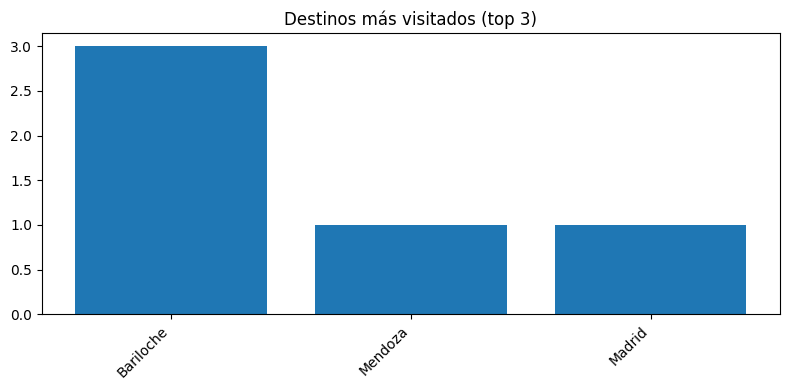

In [33]:
# M.i - Destino más visitado (Neo4j) y gráfico
from funciones_neo4j import driver
import pandas as pd
import matplotlib.pyplot as plt

query = """
MATCH (:Usuario)-[:VISITO]->(d:Destino)
RETURN d.ciudad AS ciudad, count(*) AS visitas
ORDER BY visitas DESC
"""
with driver.session() as session:
    rows = session.run(query)
    df = pd.DataFrame([r.data() for r in rows])

if df.empty:
    print("No hay datos de visitas.")
else:
    display(df.head())
    # Gráfico de barras top 3
    df_top = df.head(3)
    plt.figure(figsize=(8,4))
    plt.bar(df_top['ciudad'], df_top['visitas'])
    plt.xticks(rotation=45, ha='right')
    plt.title("Destinos más visitados (top 3)")
    plt.tight_layout()
    plt.show()

#### ii - Hotel más barato

🏨 Top 5 hoteles más económicos:

         nombre  precio    ciudad  calificacion
Altos del Norte   60000     Jujuy             3
      Hotel Sol   85000 Bariloche             4
   Montaña Real   95000   Mendoza             4
 Coliseo Suites  100000      Roma             4
    Gran Europa  110000    Madrid             4


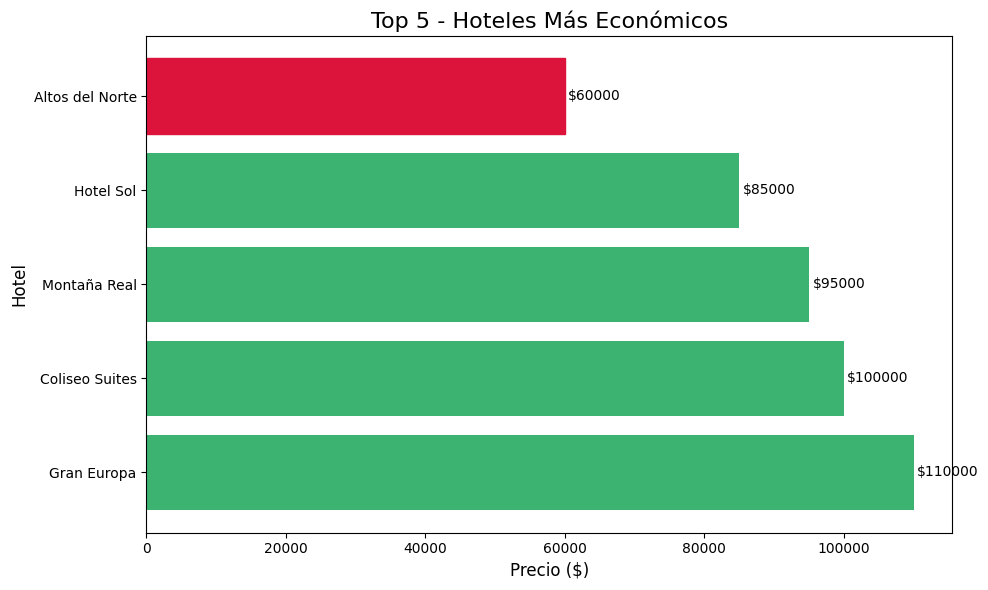

In [36]:
# M.ii - Hotel más barato
# import pandas as pd
# import matplotlib.pyplot as plt

# --- Consulta a MongoDB ---
# Tomamos los 5 hoteles más baratos
hoteles_baratos = list(funciones_mongo.db.hoteles.find({}, {"_id": 0, "nombre": 1, "precio": 1, "ciudad": 1, "calificacion": 1}).sort("precio", 1).limit(5))


# --- Crear DataFrame para mostrar como tabla ---
df_hoteles = pd.DataFrame(hoteles_baratos, columns=["nombre", "precio", "ciudad", "calificacion"])
print("🏨 Top 5 hoteles más económicos:\n")
print(df_hoteles.to_string(index=False))

# --- Preparar datos para gráfico ---
# Invertimos el orden para que el más barato quede arriba
hoteles_baratos.reverse()
nombres_hoteles = [h['nombre'] for h in hoteles_baratos]
precios_hoteles = [h['precio'] for h in hoteles_baratos]

# --- Generar gráfico ---
plt.figure(figsize=(10, 6))
bars = plt.barh(nombres_hoteles, precios_hoteles, color='mediumseagreen')

# Destacamos el hotel más barato (última barra después de invertir)
bars[-1].set_color('crimson')

plt.title('Top 5 - Hoteles Más Económicos', fontsize=16)
plt.xlabel('Precio ($)', fontsize=12)
plt.ylabel('Hotel', fontsize=12)

# Etiquetas con precios al final de cada barra
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, 
        f'${int(bar.get_width())}', va='center', ha='left')

plt.tight_layout()
plt.show()

#### iii - Buscar actividad en reservas
Se interpreta como buscar las actividades disponibles en los lugares de la base de datos de reservas donde el estado corresponde a confirmado


🌍 Top 3 destinos más visitados:
 - Cancún, México
 - Bariloche, Argentina
 - Madrid, España

🎯 Actividades en los destinos más visitados:
               nombre     tipo    ciudad  precio
Caminata en glaciares aventura Bariloche   45000


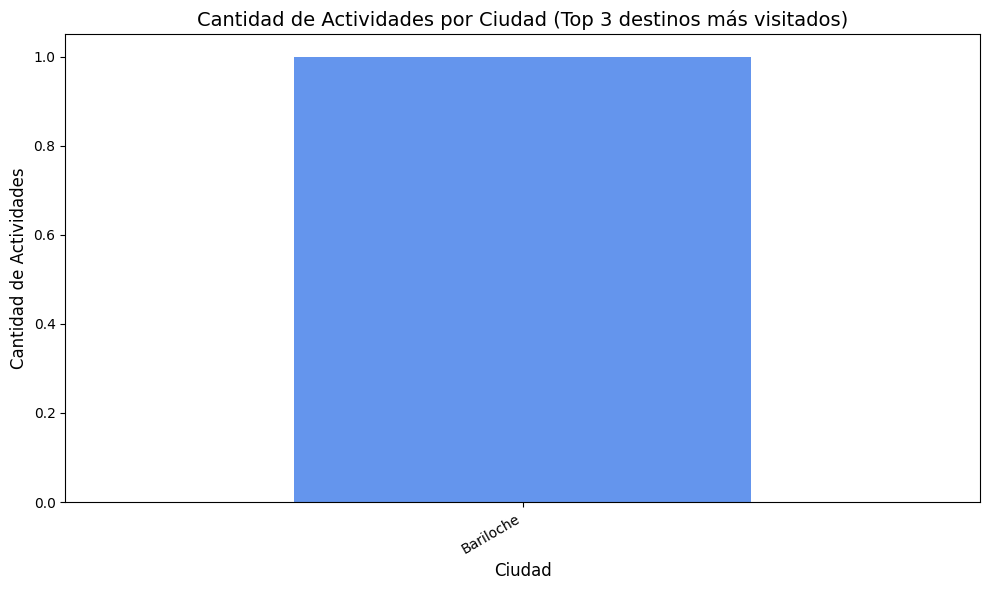

In [38]:
# M.iii - Buscar actividad en reservas
# import pandas as pd
# import matplotlib.pyplot as plt
from collections import Counter

# --- 1️⃣ Buscar los 3 destinos (destino_id) que más se repiten en reservas ---
# Obtenemos todas las reservas
reservas = list(funciones_mongo.db.reservas.find({}, {"_id": 0, "destino_id": 1}))

# Contamos las repeticiones de destino_id
conteo_destinos = Counter([r["destino_id"] for r in reservas])

# Obtenemos los 3 más repetidos
top3_destinos = [dest_id for dest_id, _ in conteo_destinos.most_common(3)]

print("\n🌍 Top 3 destinos más visitados:")
# --- 2️⃣ Buscar info (ciudad, país) de esos destinos ---
destinos_info = list(funciones_mongo.db.destinos.find(
    {"destino_id": {"$in": top3_destinos}},
    {"_id": 0, "destino_id": 1, "ciudad": 1, "pais": 1}
))

# Imprimirlos en orden del más visitado al menos
for dest_id, _ in conteo_destinos.most_common(3):
    destino = next((d for d in destinos_info if d["destino_id"] == dest_id), None)
    if destino:
        print(f" - {destino['ciudad']}, {destino['pais']}")

# --- 3️⃣ Buscar actividades en esas ciudades ---
ciudades_top3 = [d["ciudad"] for d in destinos_info]
actividades_relacionadas = list(funciones_mongo.db.actividades.find(
    {"ciudad": {"$in": ciudades_top3}},
    {"_id": 0, "nombre": 1, "tipo": 1, "ciudad": 1, "precio": 1}
))

# --- 4️⃣ Mostrar las actividades ---
if actividades_relacionadas:
    print("\n🎯 Actividades en los destinos más visitados:")
    df_actividades = pd.DataFrame(actividades_relacionadas, columns=["nombre", "tipo", "ciudad", "precio"])
    print(df_actividades.to_string(index=False))

    # --- 5️⃣ Gráfico: actividades vs ciudades ---
    plt.figure(figsize=(10, 6))

    # Contar cuántas actividades hay por ciudad
    actividades_por_ciudad = df_actividades.groupby("ciudad").size().sort_values(ascending=False)

    actividades_por_ciudad.plot(kind='bar', color='cornflowerblue')

    plt.title("Cantidad de Actividades por Ciudad (Top 3 destinos más visitados)", fontsize=14)
    plt.xlabel("Ciudad", fontsize=12)
    plt.ylabel("Cantidad de Actividades", fontsize=12)
    plt.xticks(rotation=30, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ No se encontraron actividades relacionadas con los destinos más visitados.")

## 3. Realizar modificación en los datos
a. Incrementar el precio de las actividades de Tucuman en 5%
b. Agregar al hotel id=1 el servicio de SPA
c. Eliminar el destino que desee
d. Eliminar un usuario que desee
e. Eliminar las relaciones AMIGO_DE para un usuario que quiera.


### a. Incrementar el precio de las actividades de Tucuman en 5%

In [39]:
# Filtrar actividades de Tucumán y actualizar precio
result = funciones_mongo.db.actividades.update_many(
    {"ciudad": "Tucumán"},
    {"$mul": {"precio": 1.05}} 
)
print(f"Se actualizaron {result.modified_count} actividades.")

Se actualizaron 0 actividades.


Como no hay actividades en Tucuman se decide insertar una actividad y volver a actualizar su precio

In [40]:
# Actividad a insertar en Tucumán
actividad_tucuman = {
    "actividad_id": 7,           # asegurate que sea único
    "nombre": "Excursión al Cerro San Javier",
    "tipo": "aventura",
    "ciudad": "Tucumán",
    "precio": 40000
}

# Insertar en la colección 'actividades'
funciones_mongo.insertar_documento("actividades", actividad_tucuman)

# Filtrar actividades de Tucumán y actualizar precio
result = funciones_mongo.db.actividades.update_many(
    {"ciudad": "Tucumán"},
    {"$mul": {"precio": 1.05}}  # multiplicar precio por 1.05 → +5%
)
print(f"Se actualizaron {result.modified_count} actividades.")
# Recuperar e imprimir la actividad recién insertada
actividad_insertada = funciones_mongo.db.actividades.find_one({"actividad_id": 7})
print("Actividad insertada en Tucumán:")
print(actividad_insertada)


Se actualizaron 1 actividades.
Actividad insertada en Tucumán:
{'_id': ObjectId('69018fbcd8c43bbd7838ffcf'), 'actividad_id': 7, 'nombre': 'Excursión al Cerro San Javier', 'tipo': 'aventura', 'ciudad': 'Tucumán', 'precio': 42000.0}


### b. Agregar al hotel id=1 el servicio de SPA

In [41]:
hotel_modificado = funciones_mongo.db.hoteles.find_one({"hotel_id": 1})
print("Hotel antes de ser modificado:")
print(hotel_modificado)

Hotel antes de ser modificado:
{'_id': ObjectId('69018f4dd8c43bbd7838ffbd'), 'hotel_id': 1, 'nombre': 'Hotel Sol', 'ciudad': 'Bariloche', 'precio': 85000, 'calificacion': 4, 'servicios': ['wifi', 'pileta', 'desayuno']}


In [42]:
result = funciones_mongo.db.hoteles.update_one(
    {"hotel_id": 1},
    {"$addToSet": {"servicios": "spa"}}  # $addToSet evita duplicados
)
print("Hotel actualizado correctamente.")

Hotel actualizado correctamente.


In [43]:
hotel_modificado = funciones_mongo.db.hoteles.find_one({"hotel_id": 1})
print("Hotel Modificado:")
print(hotel_modificado)

Hotel Modificado:
{'_id': ObjectId('69018f4dd8c43bbd7838ffbd'), 'hotel_id': 1, 'nombre': 'Hotel Sol', 'ciudad': 'Bariloche', 'precio': 85000, 'calificacion': 4, 'servicios': ['wifi', 'pileta', 'desayuno', 'spa']}


### c. Eliminar el destino que desee

In [44]:
# Recuperar todos los destinos
destinos = list(funciones_mongo.db.destinos.find())

print("Destinos disponibles previo a eliminar uno:")
for d in destinos:
    print(f"ID: {d['destino_id']}, Ciudad: {d['ciudad']}, País: {d['pais']}, Tipo: {d['tipo']}, Precio promedio: {d['precio_promedio']}")

Destinos disponibles previo a eliminar uno:
ID: 1, Ciudad: Bariloche, País: Argentina, Tipo: Montaña, Precio promedio: 90000
ID: 2, Ciudad: Cancún, País: México, Tipo: Playa, Precio promedio: 150000
ID: 3, Ciudad: Madrid, País: España, Tipo: Cultural, Precio promedio: 110000
ID: 4, Ciudad: Roma, País: Italia, Tipo: Histórico, Precio promedio: 100000
ID: 5, Ciudad: Mendoza, País: Argentina, Tipo: Vinos, Precio promedio: 80000


In [45]:
# Ejemplo: eliminar destino con destino_id = 3 (Madrid)
destino_a_eliminar = 3
result = funciones_mongo.db.destinos.delete_one({"destino_id": destino_a_eliminar})
print(f"Se eliminaron {result.deleted_count} destino(s).")

Se eliminaron 1 destino(s).


In [46]:
# Recuperar todos los destinos
destinos = list(funciones_mongo.db.destinos.find())

print("Destinos disponibles despues de eliminar uno:")
for d in destinos:
    print(f"ID: {d['destino_id']}, Ciudad: {d['ciudad']}, País: {d['pais']}, Tipo: {d['tipo']}, Precio promedio: {d['precio_promedio']}")

Destinos disponibles despues de eliminar uno:
ID: 1, Ciudad: Bariloche, País: Argentina, Tipo: Montaña, Precio promedio: 90000
ID: 2, Ciudad: Cancún, País: México, Tipo: Playa, Precio promedio: 150000
ID: 4, Ciudad: Roma, País: Italia, Tipo: Histórico, Precio promedio: 100000
ID: 5, Ciudad: Mendoza, País: Argentina, Tipo: Vinos, Precio promedio: 80000


### d. Eliminar un usuario que desee

In [47]:
# Recuperar todos los usuarios
usuarios = list(funciones_mongo.db.usuarios.find())

# Imprimirlos de forma legible
print("Usuarios registrados antes de la eliminacion:")
for u in usuarios:
    print(f"ID: {u['usuario_id']}, Nombre: {u['nombre']}, Email: {u['email']}, Teléfono: {u['telefono']}")

Usuarios registrados antes de la eliminacion:
ID: 1, Nombre: María Pérez, Email: maria.perez@example.com, Teléfono: +54 11 4567 1234
ID: 2, Nombre: Juan López, Email: juan.lopez@example.com, Teléfono: +54 221 334 5566
ID: 3, Nombre: Carla Gómez, Email: carla.gomez@example.com, Teléfono: +54 261 789 2233
ID: 4, Nombre: Luis Fernández, Email: luis.fernandez@example.com, Teléfono: +54 299 444 9988
ID: 5, Nombre: Ana Torres, Email: ana.torres@example.com, Teléfono: +54 381 123 4567


In [48]:
usuario_a_eliminar = 4  # el ID del usuario a borrar

# --- 1. Borrar relaciones en Neo4j ---
query_borrar_relaciones = """
MATCH (u:Usuario {usuario_id: $uid})-[r]-()
DELETE r
"""
with driver.session() as session:
    session.run(query_borrar_relaciones, uid=usuario_a_eliminar)
print(f"Se borraron las relaciones del usuario {usuario_a_eliminar} en Neo4j.")

# --- 2. Borrar nodo del usuario en Neo4j ---
query_borrar_nodo = """
MATCH (u:Usuario {usuario_id: $uid})
DELETE u
"""
with driver.session() as session:
    session.run(query_borrar_nodo, uid=usuario_a_eliminar)
print(f"Se borró el nodo del usuario {usuario_a_eliminar} en Neo4j.")

# --- 3. Borrar documento del usuario en MongoDB ---
result = funciones_mongo.db.usuarios.delete_one({"usuario_id": usuario_a_eliminar})
print(f"Se eliminaron {result.deleted_count} usuario(s) en MongoDB.")

Se borraron las relaciones del usuario 4 en Neo4j.
Se borró el nodo del usuario 4 en Neo4j.
Se eliminaron 1 usuario(s) en MongoDB.


In [49]:
# Recuperar todos los usuarios
usuarios = list(funciones_mongo.db.usuarios.find())

# Imprimirlos de forma legible
print("Usuarios despues de la eliminacion:")
for u in usuarios:
    print(f"ID: {u['usuario_id']}, Nombre: {u['nombre']}, Email: {u['email']}, Teléfono: {u['telefono']}")

Usuarios despues de la eliminacion:
ID: 1, Nombre: María Pérez, Email: maria.perez@example.com, Teléfono: +54 11 4567 1234
ID: 2, Nombre: Juan López, Email: juan.lopez@example.com, Teléfono: +54 221 334 5566
ID: 3, Nombre: Carla Gómez, Email: carla.gomez@example.com, Teléfono: +54 261 789 2233
ID: 5, Nombre: Ana Torres, Email: ana.torres@example.com, Teléfono: +54 381 123 4567


In [50]:
# funciones_neo4j.py
from funciones_neo4j import driver
from funciones_mongo import db

def borrar_usuario_neo4j(usuario_id):
    """Borra las relaciones y el nodo de un usuario en Neo4j"""
    query_borrar_relaciones = """
    MATCH (u:Usuario {usuario_id: $uid})-[r]-()
    DELETE r
    """
    query_borrar_nodo = """
    MATCH (u:Usuario {usuario_id: $uid})
    DELETE u
    """
    with driver.session() as session:
        session.run(query_borrar_relaciones, uid=usuario_id)
        session.run(query_borrar_nodo, uid=usuario_id)
    print(f"Se borró el usuario {usuario_id} y sus relaciones en Neo4j.")

def borrar_usuario_completo(usuario_id):
    """Borra el usuario en Neo4j y en MongoDB"""
    borrar_usuario_neo4j(usuario_id)
    result = db.usuarios.delete_one({"usuario_id": usuario_id})
    print(f"Se eliminaron {result.deleted_count} usuario(s) en MongoDB.")

borrar_usuario_completo(4)

# Recuperar todos los usuarios
usuarios = list(funciones_mongo.db.usuarios.find())

# Imprimirlos de forma legible
print("Usuarios despues de la eliminacion:")
for u in usuarios:
    print(f"ID: {u['usuario_id']}, Nombre: {u['nombre']}, Email: {u['email']}, Teléfono: {u['telefono']}")

Se borró el usuario 4 y sus relaciones en Neo4j.
Se eliminaron 0 usuario(s) en MongoDB.
Usuarios despues de la eliminacion:
ID: 1, Nombre: María Pérez, Email: maria.perez@example.com, Teléfono: +54 11 4567 1234
ID: 2, Nombre: Juan López, Email: juan.lopez@example.com, Teléfono: +54 221 334 5566
ID: 3, Nombre: Carla Gómez, Email: carla.gomez@example.com, Teléfono: +54 261 789 2233
ID: 5, Nombre: Ana Torres, Email: ana.torres@example.com, Teléfono: +54 381 123 4567


### e. Eliminar las relaciones AMIGO_DE para un usuario que quiera.

In [51]:
# from funciones_neo4j import driver

usuario_objetivo = 2  

query = """
MATCH (u:Usuario {usuario_id: $uid})-[r:AMIGO_DE]-()
DELETE r
"""
with driver.session() as session:
    session.run(query, uid=usuario_objetivo)

print(f"Se eliminaron las relaciones AMIGO_DE del usuario {usuario_objetivo}.")

Se eliminaron las relaciones AMIGO_DE del usuario 2.
